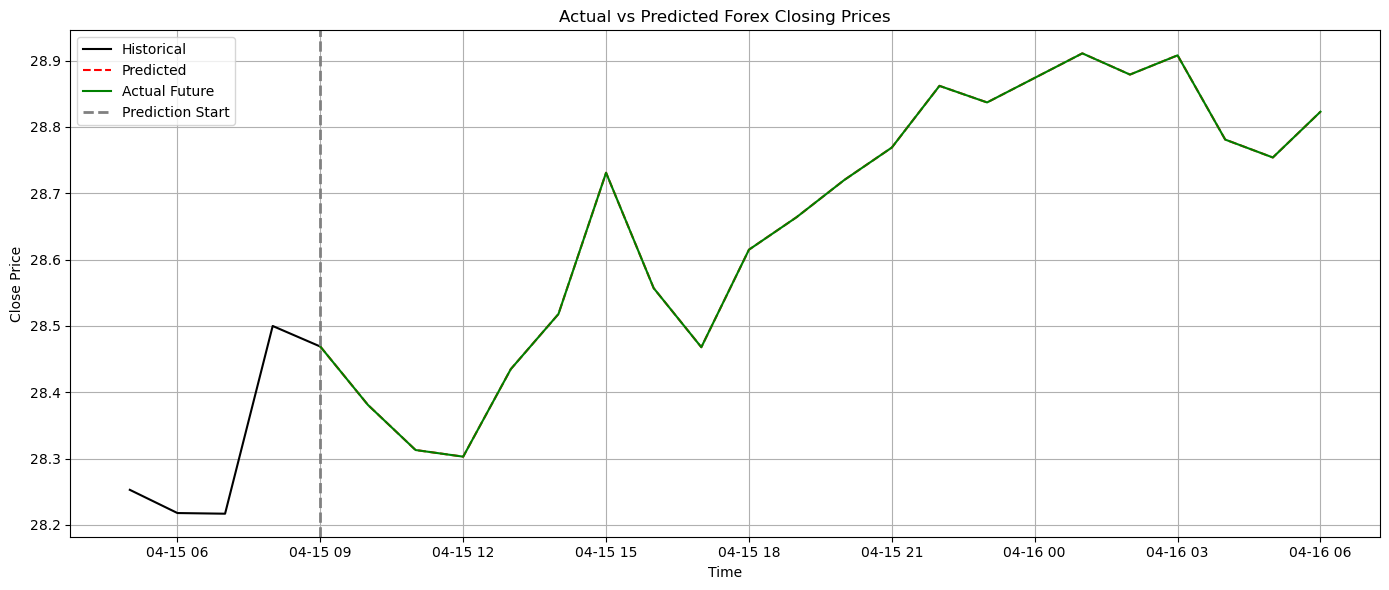

In [30]:
# ==============================
# 📌 PARAMETERS
# ==============================
csv1_path = '111.csv'   # Historical candles (actual)
csv2_path = '222.csv'   # Predicted candles (future)
csv3_path = '333.csv'   # Actual future candles (optional)

plot_title = 'Actual vs Predicted Forex Closing Prices'
historical_color = 'black'
actual_future_color = 'green'
predicted_color = 'red'
vertical_line_color = 'gray'
vertical_line_width = 2  # Bolder vertical line

output_plot_path = None  # Set to file name to save, or None to skip

# ==============================
# 🧩 IMPORTS
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import os

# ==============================
# 🔧 UTILITY FUNCTIONS
# ==============================

def load_csv_with_datetime(csv_path):
    """
    Loads a CSV file and returns a DataFrame with a DATETIME column and <CLOSE>.
    """
    df = pd.read_csv(csv_path, sep='\t' if '\t' in open(csv_path).readline() else ',')
    df['DATETIME'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%Y.%m.%d %H:%M:%S')
    return df[['DATETIME', '<CLOSE>']].reset_index(drop=True)

def plot_all_series(historical_df, predicted_df, actual_future_df, title, colors, output_path=None):
    """
    Plots historical, predicted, and actual future data based on closing prices.
    """
    plt.figure(figsize=(14, 6))

    # Plot historical
    plt.plot(historical_df['DATETIME'], historical_df['<CLOSE>'],
             label='Historical', color=colors['historical'])

    # Plot predicted
    plt.plot(predicted_df['DATETIME'], predicted_df['<CLOSE>'],
             label='Predicted', color=colors['predicted'], linestyle='--')

    # Plot actual future (if available)
    if actual_future_df is not None:
        plt.plot(actual_future_df['DATETIME'], actual_future_df['<CLOSE>'],
                 label='Actual Future', color=colors['actual'])

    # Vertical line at the end of historical data
    prediction_start_time = historical_df['DATETIME'].iloc[-1]
    plt.axvline(x=prediction_start_time, color=vertical_line_color,
                linestyle='--', linewidth=vertical_line_width, label='Prediction Start')

    # Final chart polish
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path)
    plt.show()

# ==============================
# 🚀 MAIN EXECUTION
# ==============================

# Load all available datasets
historical_df = load_csv_with_datetime(csv1_path)
predicted_df = load_csv_with_datetime(csv2_path)

if os.path.exists(csv3_path):
    actual_future_df = load_csv_with_datetime(csv3_path)
else:
    actual_future_df = None
    print(f"⚠️ Warning: '{csv3_path}' not found. Skipping actual future candle plotting.")

# Plot
plot_all_series(
    historical_df=historical_df,
    predicted_df=predicted_df,
    actual_future_df=actual_future_df,
    title=plot_title,
    colors={
        'historical': historical_color,
        'actual': actual_future_color,
        'predicted': predicted_color
    },
    output_path=output_plot_path
)
